In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
file_path = '/content/Titanic-Dataset.csv'  # Replace with your dataset path
titanic_data = pd.read_csv(file_path)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.shape


(891, 12)

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

<ipython-input-20-44c181cb7a9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-20-44c181cb7a9a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

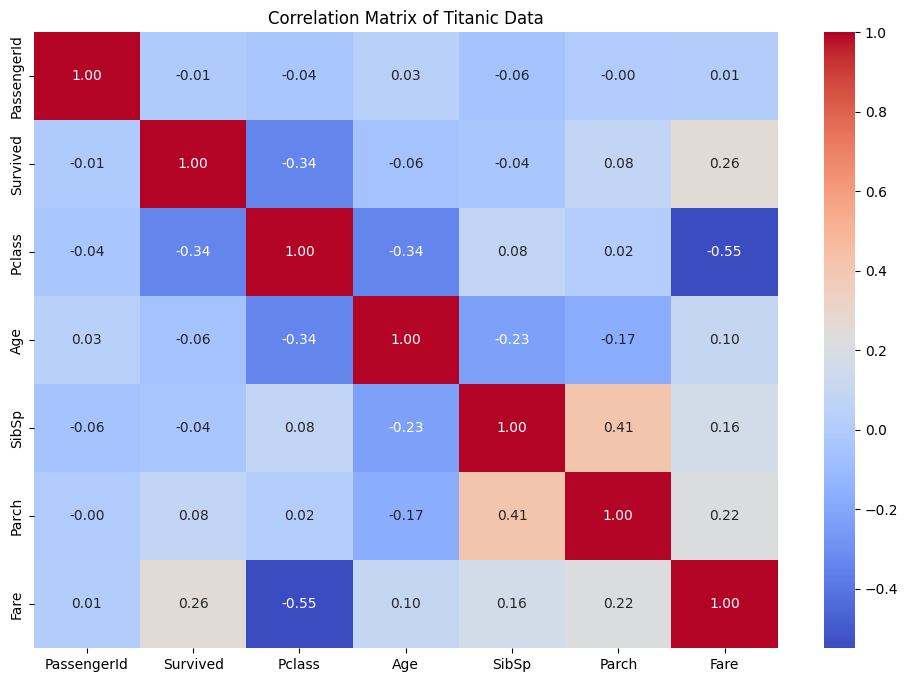

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Drop non-numeric columns before calculating the correlation matrix
numeric_data = titanic_data.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8)) # Now plt is defined and can be used
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Data')
plt.show()

In [ ]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)


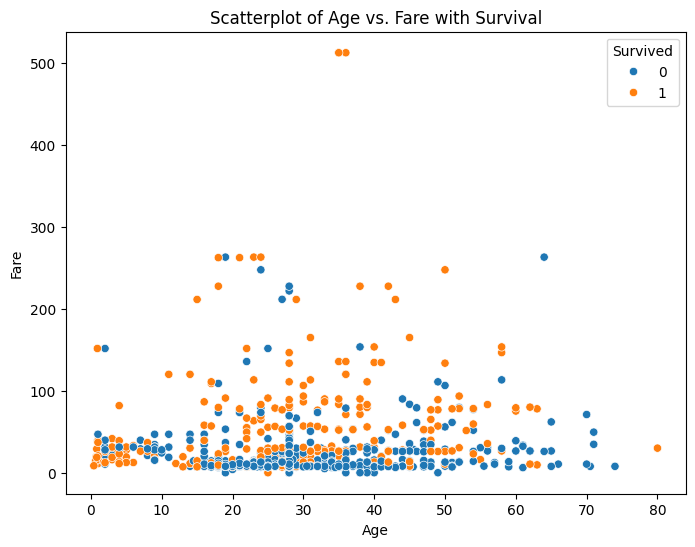

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data)
plt.title('Scatterplot of Age vs. Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [ ]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

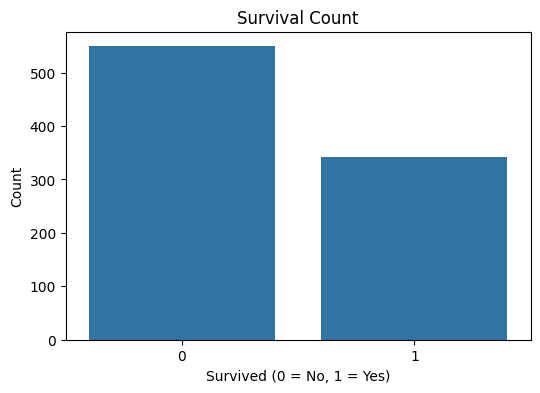

In [ ]:

# Assuming 'Survived' is a categorical variable (0 or 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


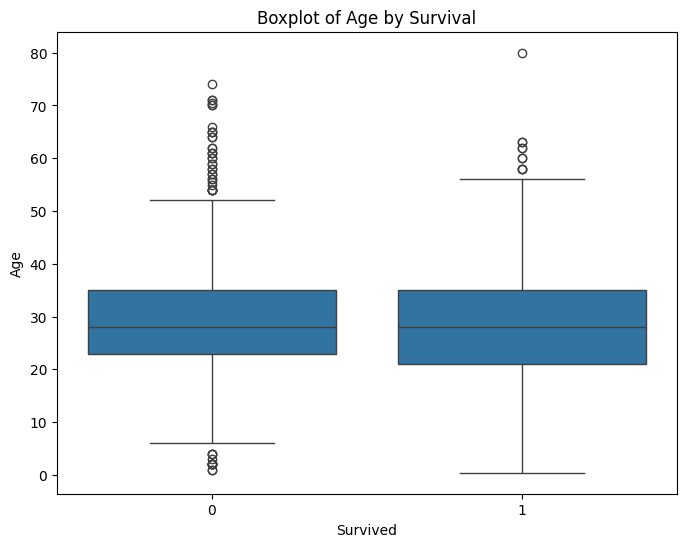

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_rep)

Accuracy: 77.99%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print('Logistic Regression Classification Report:')
print(classification_rep_lr)


Logistic Regression Accuracy: 80.97%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

print(f'Best Random Forest Accuracy: {accuracy_best_rf * 100:.2f}%')
print('Best Random Forest Classification Report:')
print(classification_rep_best_rf)


Best Random Forest Accuracy: 81.72%
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.67      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')
print('Decision Tree Classification Report:')
print(classification_rep_dt)


Decision Tree Accuracy: 74.63%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [ ]:

from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('SVM Classification Report:')
print(classification_rep_svm)


SVM Accuracy: 65.67%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.74      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.69      0.60      0.57       268
weighted avg       0.68      0.66      0.61       268



In [ ]:


models = {
    'Random Forest': accuracy,
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm
}

best_model = max(models, key=models.get)
best_accuracy = models[best_model]

print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")



Best Model: Logistic Regression
Best Accuracy: 80.97%


In [ ]:

passenger_features = {
    'Pclass': 2,
    'Age': 30,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Sex_male': 1,
    'Embarked_Q': 0,
    'Embarked_S': 1
}

# Convert input features to DataFrame
passenger_df = pd.DataFrame([passenger_features])

# Use the best_rf_model (trained by GridSearchCV) for prediction
prediction = best_rf_model.predict(passenger_df)[0]  # Changed line to use best_rf_model

if prediction == 1:
  print("The passenger is predicted to have survived.")
else:
  print("The passenger is predicted to have not survived.")

The passenger is predicted to have not survived.


In [ ]:

# Input features for prediction (adjust these as needed)
passenger_features = {
    'Pclass': 1,  # Example: 1st class passenger
    'Age': 25,  # Example: 25 years old
    'SibSp': 1,  # Example: Has one sibling or spouse aboard
    'Parch': 0,  # Example: Has no parents or children aboard
    'Fare': 70,  # Example: Paid a fare of 70
    'Sex_male': 0,  # Example: Female (0 for female, 1 for male)
    'Embarked_Q': 0,  # Example: Did not embark from Queenstown
    'Embarked_S': 1,  # Example: Embarked from Southampton
}

# Convert input features to DataFrame
passenger_df = pd.DataFrame([passenger_features])
rf_model.fit(X_train, y_train)  # Add this line

# Predict survival using the best model (Random Forest in this case)
prediction = rf_model.predict(passenger_df)[0]


if prediction == 1:
  print("The passenger is predicted to have survived.")
else:
  print("The passenger is predicted to have not survived.")


The passenger is predicted to have survived.


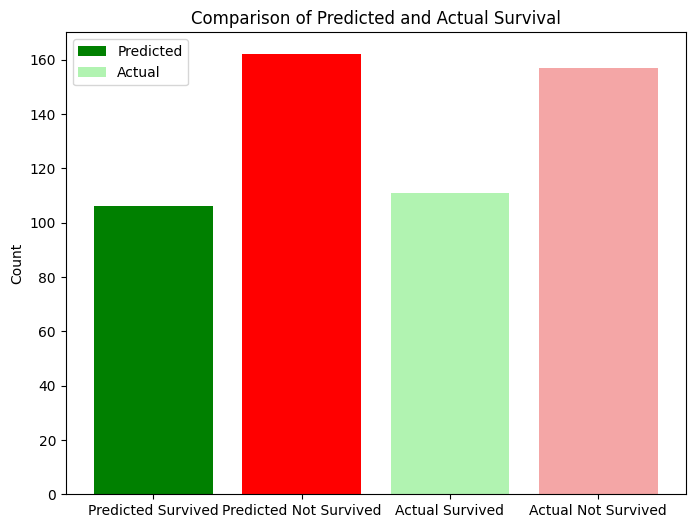

In [ ]:

import matplotlib.pyplot as plt

# Assuming y_pred contains the predictions from your best model (e.g., rf_model)
# and y_test contains the true labels

# Create a bar plot comparing predicted and actual survival counts
plt.figure(figsize=(8, 6))
plt.bar(['Predicted Survived', 'Predicted Not Survived'], [sum(y_pred), len(y_pred) - sum(y_pred)], color=['green', 'red'], label='Predicted')
plt.bar(['Actual Survived', 'Actual Not Survived'], [sum(y_test), len(y_test) - sum(y_test)], color=['lightgreen', 'lightcoral'], label='Actual', alpha=0.7)

plt.title('Comparison of Predicted and Actual Survival')
plt.ylabel('Count')
plt.legend()
plt.show()


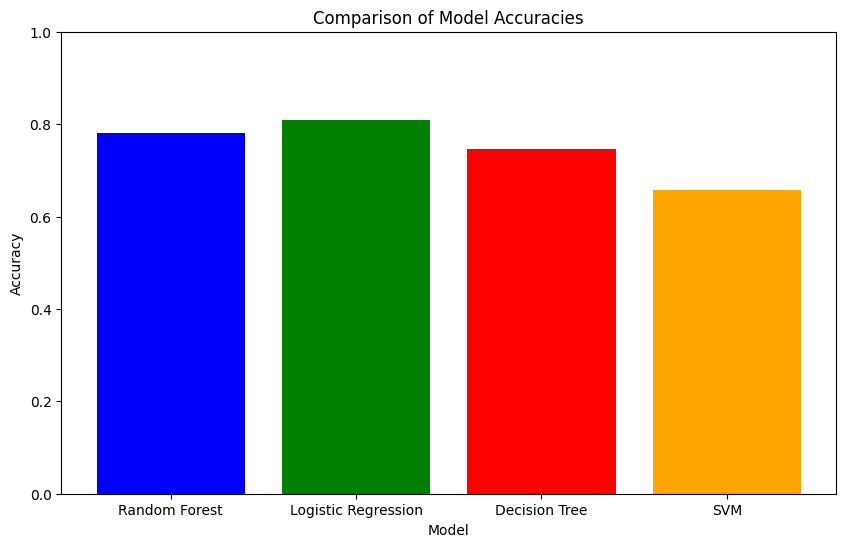

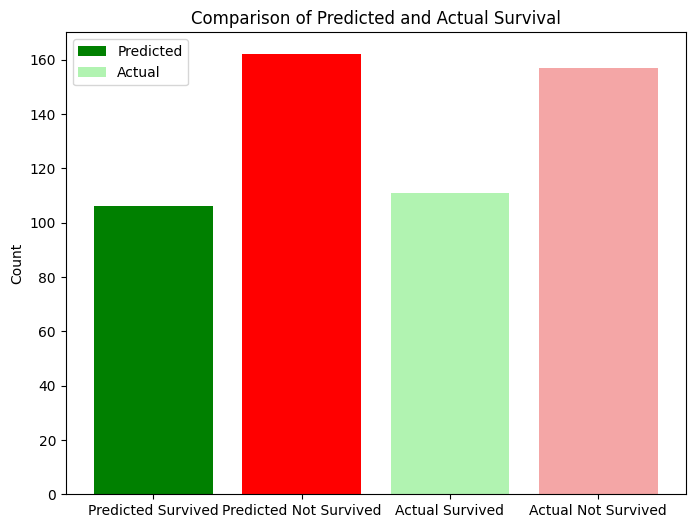

In [ ]:


import matplotlib.pyplot as plt

# Assuming you have the following variables:
# - accuracy_rf (accuracy of Random Forest model)
# - accuracy_lr (accuracy of Logistic Regression model)
# - accuracy_dt (accuracy of Decision Tree model)
# - accuracy_svm (accuracy of SVM model)

model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [accuracy, accuracy_lr, accuracy_dt, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# Create a bar plot comparing predicted and actual survival counts
plt.figure(figsize=(8, 6))
plt.bar(['Predicted Survived', 'Predicted Not Survived'], [sum(y_pred), len(y_pred) - sum(y_pred)], color=['green', 'red'], label='Predicted')
plt.bar(['Actual Survived', 'Actual Not Survived'], [sum(y_test), len(y_test) - sum(y_test)], color=['lightgreen', 'lightcoral'], label='Actual', alpha=0.7)

plt.title('Comparison of Predicted and Actual Survival')
plt.ylabel('Count')
plt.legend()
plt.show()
